In [25]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [26]:
import os
import glob
import json
import torch
import numpy as np
import pandas as pd

import matplotlib
from matplotlib.backends.backend_pgf import FigureCanvasPgf
from matplotlib import pyplot as plt
%matplotlib inline

import tsvar
tsvar.plotting.set_neurips_matplotib_rcparams()

In [27]:
import matplotlib
matplotlib.rcParams.update({
    "font.family": "sans-serif",             # use serif rather than sans-serif
    "font.serif": "Deja-Vu",    # use "Times New Roman" as the standard font

})

In [45]:
output_df = tsvar.plotting.load_outputs(exp_dir="../output/dimRegime-5/")
cols = [col for col in output_df.columns if col.startswith('mle')]

Process file: ../output/dimRegime-5/1590697286-g04-d35-n350000/output-02.json...


In [46]:
def build_Id(row):
    return os.path.join(os.path.split(row['expId'])[1], row['outputIdx'])
output_df['Id'] = output_df.apply(build_Id, axis=1)

print(output_df.shape)
output_df.head()

(121, 39)


,mle_baseline,mle_beta,mle_adjacency,mle_conv,mle_history,mle_num_iter,bbvi_loc,bbvi_log_scale,bbvi_coeffs_mean,bbvi_coeffs_mode,...,outputIdx,dim_o,baseline,beta,adjacency,dim,max_jumps,sim_seed_list,gen_seed,Id
0,"[0.3713181986197834, 0.3813487458833793, 0.019...","[[1.5171843821528346, 1.8531080370869526, 0.46...","[[1e-10, 1e-10, 0.15674265124803155, 1e-10, 1e...",True,"{'iter': [100, 200, 300, 400, 500, 600, 700, 8...",3500,"[-3.5993590354919434, -3.263768196105957, -3.6...","[-3.311981201171875, -3.5071330070495605, -3.0...","[0.027359404369453656, 0.038261209094900286, 0...","[0.027304952218375866, 0.03820965061011247, 0....",...,output-00.json,5,"[0.024, 0.0331, 0.0149, 0.0235, 0.0249]","[[0.0707, 0.2669, 0.4073, 0.7475, 0.9723], [0....","[[0.1403, 0.1639, 0.1428, 0.1062, 0.0], [0.0, ...",5,50000,"[1633236564, 2118749951, 1947531723, 752426828]",967567147,1590697275-g00-d05-n050000/output-00.json
1,"[0.4843596909891997, 0.03307358014121794, 0.48...","[[0.8723631094394336, 0.16436517658106298, 1.7...","[[1e-10, 0.1578629058589806, 1e-10, 1e-10, 1e-...",True,"{'iter': [100, 200, 300, 400, 500, 600, 700, 8...",2400,"[-3.440060615539551, -3.206223249435425, -4.27...","[-3.3931424617767334, -3.6683592796325684, -2....","[0.03208084879639017, 0.04052250997107021, 0.0...","[0.03202655836697523, 0.040482947890380594, 0....",...,output-01.json,5,"[0.024, 0.0331, 0.0149, 0.0235, 0.0249]","[[0.0707, 0.2669, 0.4073, 0.7475, 0.9723], [0....","[[0.1403, 0.1639, 0.1428, 0.1062, 0.0], [0.0, ...",5,50000,"[1633236564, 2118749951, 1947531723, 752426828]",967567147,1590697275-g00-d05-n050000/output-01.json
2,"[0.571881576130403, 0.43243257049878236, 0.724...","[[3.0233349589719105, 2.0896891630950734, 2.50...","[[1e-10, 1e-10, 1e-10, 0.08090752007732734, 1e...",True,"{'iter': [100, 200, 300, 400, 500, 600, 700, 8...",2600,"[-3.5734407901763916, -3.239877223968506, -3.6...","[-3.2664976119995117, -3.6382153034210205, -3....","[0.028079557204844282, 0.03918225163993569, 0....","[0.028018355430008284, 0.03914162211702551, 0....",...,output-02.json,5,"[0.024, 0.0331, 0.0149, 0.0235, 0.0249]","[[0.0707, 0.2669, 0.4073, 0.7475, 0.9723], [0....","[[0.1403, 0.1639, 0.1428, 0.1062, 0.0], [0.0, ...",5,50000,"[1633236564, 2118749951, 1947531723, 752426828]",967567147,1590697275-g00-d05-n050000/output-02.json
3,"[0.020660006766004047, 0.02607445875786398, 0....","[[1e-10, 0.5286906880829361, 0.486034542094672...","[[0.13539323328800398, 0.19657069796787263, 0....",False,"{'iter': [100, 200, 300, 400, 500, 600, 700, 8...",20000,"[-3.7119157314300537, -3.3845784664154053, -4....","[-3.2542450428009033, -3.415938138961792, -2.7...","[0.024448892344247162, 0.03391021269922776, 0....","[0.024394283416832172, 0.03385538194073589, 0....",...,output-03.json,5,"[0.024, 0.0331, 0.0149, 0.0235, 0.0249]","[[0.0707, 0.2669, 0.4073, 0.7475, 0.9723], [0....","[[0.1403, 0.1639, 0.1428, 0.1062, 0.0], [0.0, ...",5,50000,"[1633236564, 2118749951, 1947531723, 752426828]",967567147,1590697275-g00-d05-n050000/output-03.json
4,"[0.029776449747017392, 0.010294526707256512, 0...","[[0.5592430530943593, 0.3493233232910221, 0.00...","[[0.008289701141699362, 0.14528122633187046, 0...",False,"{'iter': [100, 200, 300, 400, 500, 600, 700, 8...",20000,"[-3.2700741291046143, -4.158210277557373, -2.8...","[-3.3769543170928955, -2.850595235824585, -4.0...","[0.03802577829372861, 0.01566166479561597, 0.0...","[0.037959311568342216, 0.015583349692844835, 0...",...,output-00.json,5,"[0.0265, 0.0104, 0.0478, 0.0463, 0.0229]","[[0.9769, 0.1822, 0.2742, 0.649, 0.8892], [0.9...","[[0.0, 0.1459, 0.1385, 0.0, 0.124], [0.1878, 0...",5,50000,"[1356435138, 1019291352, 1784479631, 2142128613]",1211688996,1590697275-g01-d05-n050000/output-00.json


---

In [42]:
suf_col_dict = {
    'mle': 'mle_adjacency', 
    'bbvi_mean': 'bbvi_adj_mean', 
    'bbvi_mode': 'bbvi_adj_mode',
    'vi_mean': 'vi_adj_mean',
    'vi_mode': 'vi_adj_mode',
    #'vi_fixed_beta_mean': 'vi_fixed_beta_adj_mean',
    #'vi_fixed_beta_mode': 'vi_fixed_beta_adj_mode',
    'gb': 'gb_adj_normed',
}

plot_df = tsvar.plotting.make_plot_df(output_df, suf_col_dict, agg_col='dim', threshold=0.05)
plot_df

acc_mle                                     acc_bbvi_mean            \
          min       max      mean       std count           min       max   
dim                                                                         
5    0.280000  0.960000  0.596000  0.266249    20      0.960000  1.000000   
10   0.500000  0.970000  0.722500  0.169826    20      0.980000  1.000000   
15   0.617778  0.960000  0.744444  0.125538    20      0.982222  1.000000   
20   0.705000  0.815000  0.748250  0.028724    20      0.977500  0.997500   
25   0.728000  0.968000  0.803874  0.074113    19      0.977600  1.000000   
30   0.762222  0.820000  0.800463  0.016874    12      0.984444  0.996667   
35   0.793469  0.817143  0.803032  0.009025     7      0.982857  0.992653   

                               ... fn_vi_mode                                \
         mean       std count  ...        min max      mean       std count   
dim                            ...                                            
5    0.998000  0.008944    20  ...          0   0  0.000000  0.000000    20   
10   0.997500  0.005501    20  ...          0   1  0.100000  0.307794    20   
15   0.993111  0.005853    20  ...          0   1  0.200000  0.410391    20   
20   0.991250  0.005821    20  ...          0   2  0.650000  0.670820    20   
25   0.989642  0.006182    19  ...          0   5  1.947368  1.928548    19   
30   0.990093  0.004431    12  ...          0   6  2.916667  1.564279    12   
35   0.988688  0.003477     7  ...          2   5  3.571429  1.397276     7   

    fn_gb                                   
      min  max       mean        std count  
dim                                         
5       0    2   0.900000   0.718185    20  
10      2   11   6.550000   2.372540    20  
15      9   22  16.200000   3.791958    20  
20     23   43  32.650000   5.382965    20  
25     31   71  51.631579  11.880004    19  
30     50   88  69.166667  11.328430    12  
35     78  107  94.857143   9.476789     7  

[7 rows x 240 columns]

In [43]:
def get_runtime(row, start_idx=0, unit='sec'):
    if unit == 'sec':
        factor = 1
    elif unit == 'min':
        factor = 1 / 60
    elif unit == 'hour':
        factor = 1 / 3600
    else:
        raise ValueError('Unknown unit')
    times = row['time'][start_idx:]
    if len(times) > 0:
        last_iter = row['iter'][-1]
        return np.mean(times) * last_iter * factor
    return np.nan

unit = 'min'

rt_df = pd.DataFrame(index=output_df.index)
rt_df['dim'] = output_df['dim']
rt_df['runtime_mle'] = output_df['mle_history'].apply(get_runtime, start_idx=0, unit=unit)
rt_df['runtime_bbvi_mean'] = output_df['bbvi_history'].apply(get_runtime, start_idx=0, unit=unit)

rt_df['runtime_vi_mean'] = output_df['vi_history'].apply(get_runtime, start_idx=1, unit=unit)
rt_df['runtime_vi_mode'] = output_df['vi_history'].apply(get_runtime, start_idx=1, unit=unit)


#rt_df['runtime_vi_fixed_beta_mean'] = output_df['vi_fixed_beta_history'].apply(get_runtime, start_idx=10, unit=unit)
rt_df['runtime_gb'] = output_df['gb_history'].apply(get_runtime, start_idx=0, unit=unit)

rt_df = rt_df.groupby('dim', ).agg(['mean', 'std'])

plot_df = plot_df.join(rt_df)
plot_df

acc_mle                                     acc_bbvi_mean            \
          min       max      mean       std count           min       max   
dim                                                                         
5    0.280000  0.960000  0.596000  0.266249    20      0.960000  1.000000   
10   0.500000  0.970000  0.722500  0.169826    20      0.980000  1.000000   
15   0.617778  0.960000  0.744444  0.125538    20      0.982222  1.000000   
20   0.705000  0.815000  0.748250  0.028724    20      0.977500  0.997500   
25   0.728000  0.968000  0.803874  0.074113    19      0.977600  1.000000   
30   0.762222  0.820000  0.800463  0.016874    12      0.984444  0.996667   
35   0.793469  0.817143  0.803032  0.009025     7      0.982857  0.992653   

                               ... runtime_mle            runtime_bbvi_mean  \
         mean       std count  ...        mean        std              mean   
dim                            ...                                            
5    0.998000  0.008944    20  ...    2.368088   2.598893          6.455871   
10   0.997500  0.005501    20  ...    9.452662   9.503132         21.061690   
15   0.993111  0.005853    20  ...   15.709074  17.464181         45.361097   
20   0.991250  0.005821    20  ...    9.157765   3.188156         72.081699   
25   0.989642  0.006182    19  ...   37.629579  47.103765        135.685196   
30   0.990093  0.004431    12  ...   21.657032   6.017968        199.555239   
35   0.988688  0.003477     7  ...   40.018012  23.698676        267.224127   

               runtime_vi_mean           runtime_vi_mode           runtime_gb  \
           std            mean       std            mean       std       mean   
dim                                                                             
5     0.485097        0.135390  0.020208        0.135390  0.020208   0.424452   
10    2.036347        0.562829  0.041053        0.562829  0.041053   0.968354   
15    4.327978        1.385976  0.177799        1.385976  0.177799   1.578424   
20    8.449884        2.816695  0.369232        2.816695  0.369232   2.170876   
25   14.226212        5.530765  0.808736        5.530765  0.808736   2.775865   
30   12.951277        8.074083  1.209815        8.074083  1.209815   3.419306   
35   16.351019       10.569956  1.114384       10.569956  1.114384   4.107320   

               
          std  
dim            
5    0.016425  
10   0.086295  
15   0.118409  
20   0.136044  
25   0.198343  
30   0.182228  
35   0.215433  

[7 rows x 250 columns]

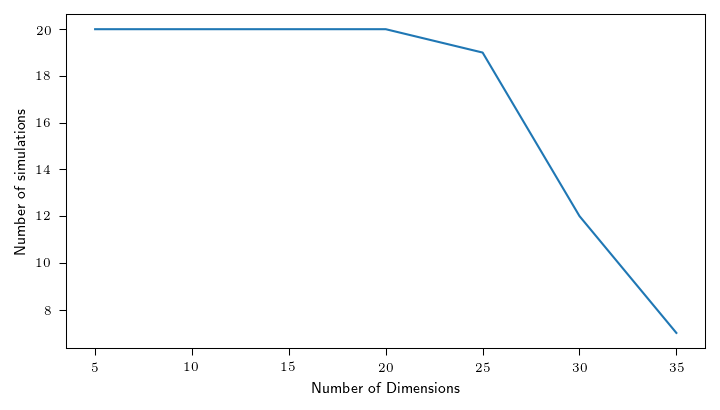

In [32]:
plt.figure()
plt.plot(plot_df.index, plot_df['acc_mle']['count'])
plt.ylabel('Number of simulations')
plt.xlabel('Number of Dimensions');

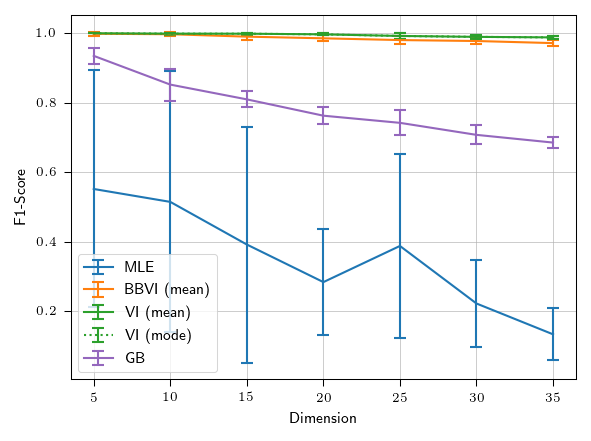

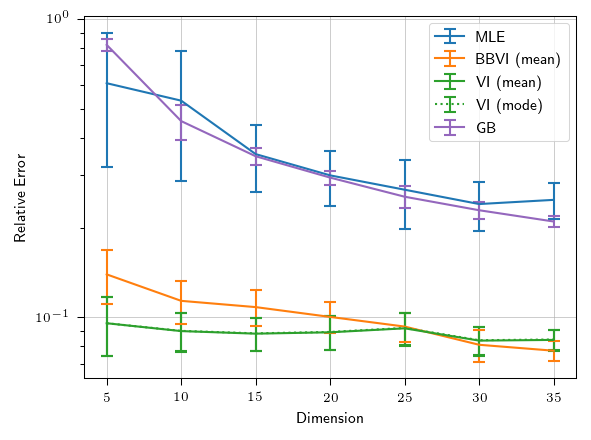

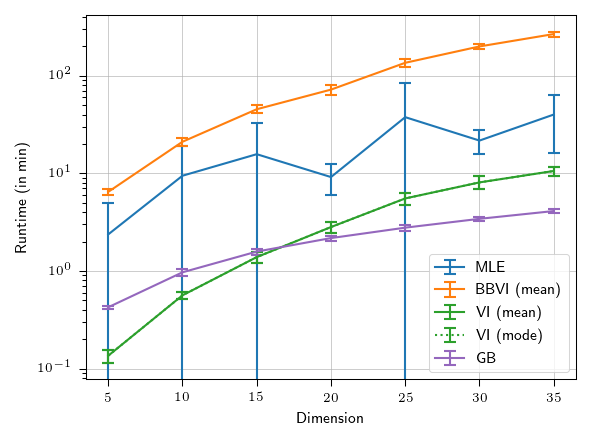

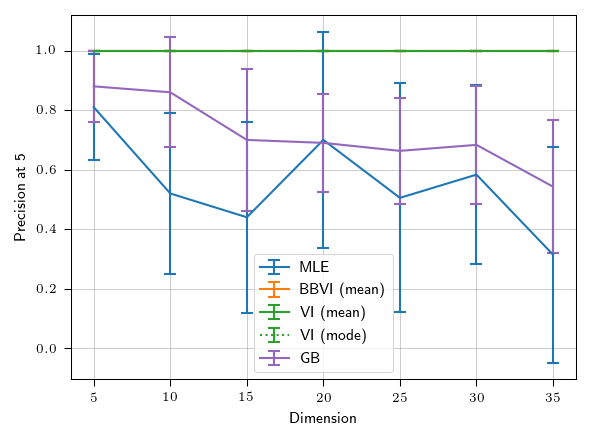

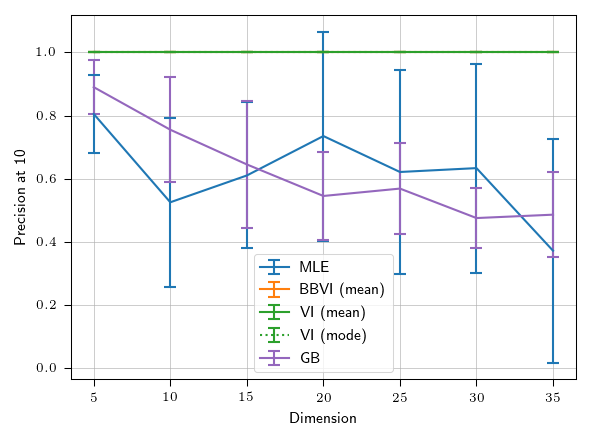

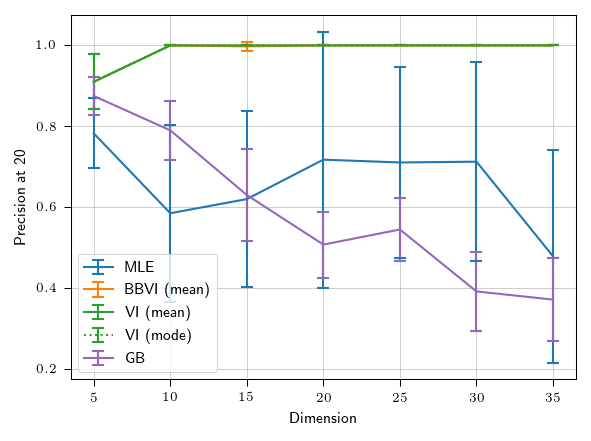

In [44]:
plot_meta_data = [
#    ('acc', 'Accuracy'),
    ('f1score', 'F1-Score'), 
    ('relerr', 'Relative Error'),
    ('runtime', f'Runtime (in {unit})'),
    ('precAt5', 'Precision at 5'),
    ('precAt10', 'Precision at 10'),
    ('precAt20', 'Precision at 20')
]

queries_list = [
    ('mle',                'MLE',          'C0', '-'), 
    ('bbvi_mean',          'BBVI (mean)',  'C1', '-'), 
    #('bbvi_mode',          'BBVI (mode)',  'C1', ':'),
    ('vi_mean',            'VI (mean)',    'C2', '-'),
    ('vi_mode',            'VI (mode)',    'C2', ':'),
    #('vi_fixed_beta_mean', 'VI-fb (mean)', 'C3', '-'),
    #('vi_fixed_beta_mode', 'VI-fb (mode)', 'C3', ':'),
    ('gb',                 'GB',           'C4', '-'),
]

for prefix, ylabel in plot_meta_data:

    plt.figure(figsize=(3.95, 2.95))
    plt.grid()
    for suf, label, color, ls in queries_list:
        col = '_'.join([prefix, suf])
        plt.errorbar(plot_df.index, plot_df[col]['mean'], yerr=plot_df[col]['std'], 
                     label=label, color=color, linestyle=ls)
    plt.legend()
    plt.xlabel('Dimension')
    #plt.xscale('log')
    plt.ylabel(ylabel);
    
    if prefix == 'relerr':
        plt.yscale('log')
        pass
        
    if prefix == 'runtime':
        plt.yscale('log')
        pass
    
    plt.tight_layout()
    #plt.savefig(f'/root/figures/fig-{prefix}.pdf')